In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Paths towards the JSON outputs ###
path_call_quanto = "C:\\Users\\Zachary\\Documents\\3A\\pricer-multi-devises\\data\\call_quanto_portfolio.json"
path_call_currency = "C:\\Users\\Zachary\\Documents\\3A\\pricer-multi-devises\\data\\call_currency_portfolio.json"
path_foreign_asian = "C:\\Users\\Zachary\\Documents\\3A\\pricer-multi-devises\\data\\foreign_asian_portfolio.json"
path_quanto_exchange = "C:\\Users\\Zachary\\Documents\\3A\\pricer-multi-devises\\data\\quanto_exchange_portfolio.json"

### Creation of the DataFrames for analysis ###

# Call quanto
df_call_quanto = pd.read_json(path_call_quanto)
df_call_quanto = df_call_quanto.set_index(df_call_quanto["date"])
df_call_quanto.drop(["date"], axis=1, inplace=True)

# Call currency
df_call_currency = pd.read_json(path_call_currency)
df_call_currency = df_call_currency.set_index(df_call_currency["date"])
df_call_currency.drop(["date"], axis=1, inplace=True)

# Foreign Asian
df_foreign_asian = pd.read_json(path_foreign_asian)
df_foreign_asian = df_foreign_asian.set_index(df_foreign_asian["date"])
df_foreign_asian.drop(["date"], axis=1, inplace=True)
                      
# Quanto exchange
df_quanto_exchange = pd.read_json(path_quanto_exchange)
df_quanto_exchange = df_quanto_exchange.set_index(df_quanto_exchange["date"])
df_quanto_exchange.drop(["date"], axis=1, inplace=True)


# Couverture du call quanto

In [2]:
df_call_quanto.head()

,deltas,deltasStdDev,price,priceStdDev,value
date,,,,,
0,"[0.6776727351374361, 0.0]","[0.003276845625757, 0.0]",2.537320,0.019292,2.537320
1,"[0.512940616904347, 0.0]","[0.0029790963927140003, 0.0]",1.751572,0.015741,1.701653
2,"[0.498092220971374, 0.0]","[0.002917135988399, 0.0]",1.663358,0.014965,1.633723
3,"[0.4680073043599, 0.0]","[0.002855318384394, 0.0]",1.537436,0.014427,1.510904
4,"[0.44431256792772106, 0.0]","[0.002793149899768, 0.0]",1.428566,0.013835,1.424926


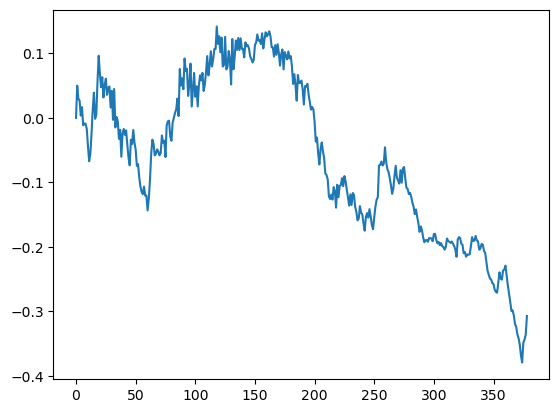

In [3]:
plt.plot(df_call_quanto["price"] - df_call_quanto["value"])

In [4]:
price = np.array(df_call_quanto["price"])
value = np.array(df_call_quanto["value"])
tracking_error_call_quanto = (price - value) / value

# Couverture du call currency

In [5]:
df_call_currency.head()

,deltas,deltasStdDev,price,priceStdDev,value
date,,,,,
0,[0.527495218539453],[0.0016963368640190001],5.990710,0.029416,5.990710
1,[0.49152365904360606],[0.0016847915586770002],5.401587,0.027930,5.397429
2,[0.48482190956123405],[0.0016782896466780001],5.230991,0.027224,5.291098
3,[0.513208618893441],[0.0016912277136500002],5.698651,0.028459,5.765770
4,[0.506184385291379],[0.0016889857639130002],5.595238,0.028170,5.637264


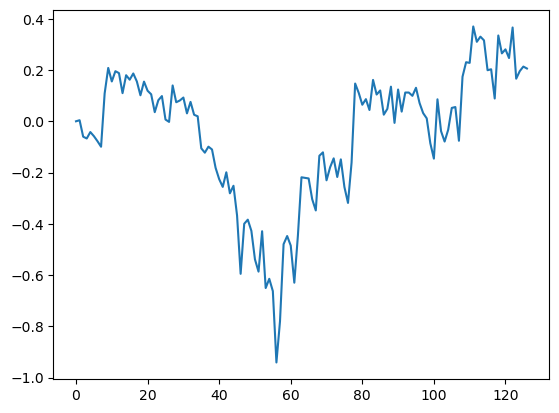

In [6]:
plt.plot(df_call_currency["price"] - df_call_currency["value"])

In [7]:
price = np.array(df_call_currency["price"])
value = np.array(df_call_currency["value"])
tracking_error_call_currency = (price - value) / value

# Couverture du foreign asian

In [8]:
df_foreign_asian.head()

,deltas,deltasStdDev,price,priceStdDev,value
date,,,,,
0,"[-0.600831231472401, 0.686640727315835, 0.0]","[0.0018703416242780001, 0.002315755459666, 0.0]",1.524599,0.008482,1.524599
1,"[-0.590628365539428, 0.6982716552201581, 0.0]","[0.0019377985313370001, 0.0024936680115000003,...",1.725183,0.009997,1.551509
2,"[-0.583690791338766, 0.6874244092350711, 0.0]","[0.0019350922160300001, 0.002480340423392, 0.0]",1.680117,0.009857,1.494679
3,"[-0.5460265805202881, 0.635826414750956, 0.0]","[0.001915939992996, 0.002417117969505, 0.0]",1.502969,0.009151,1.329782
4,"[-0.5581208266579241, 0.6518420734203481, 0.0]","[0.001902790209649, 0.002409345150764, 0.0]",1.553933,0.009278,1.390521


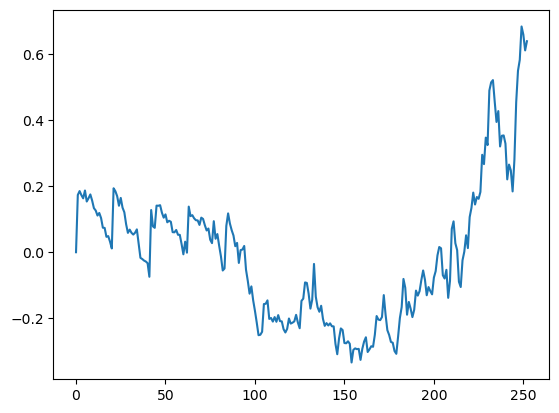

In [9]:
plt.plot(df_foreign_asian["price"] - df_foreign_asian["value"])

In [10]:
price = np.array(df_foreign_asian["price"])
value = np.array(df_foreign_asian["value"])
tracking_error_foreign_asian = (price - value) / value

# Couverture du quanto exchange

In [11]:
df_quanto_exchange.head()

,deltas,deltasStdDev,price,priceStdDev,value
date,,,,,
0,"[0.573005388181499, -0.42005996174702004, 0.0]","[0.0023992542459750003, 0.001967002466813, 0.0]",1.123165,0.007435,1.123165
1,"[0.576252709846187, -0.41985656833594104, 0.0]","[0.0023969066349480003, 0.001958170426213, 0.0]",1.135517,0.007435,1.134337
2,"[0.58131839661324, -0.42286293814941905, 0.0]","[0.0024007908934340003, 0.0019588092840510003,...",1.150820,0.007514,1.147671
3,"[0.608002065290706, -0.433302243944781, 0.0]","[0.002371728286707, 0.001910711116692, 0.0]",1.224142,0.007629,1.230970
4,"[0.6229856276806901, -0.441908168704411, 0.0]","[0.0023915177967320004, 0.0019138277879460002,...",1.282028,0.007821,1.273484


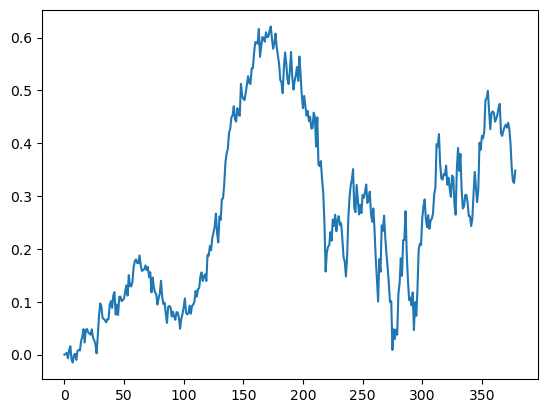

In [12]:
plt.plot(df_quanto_exchange["price"] - df_quanto_exchange["value"])

In [13]:
price = np.array(df_quanto_exchange["price"])
value = np.array(df_quanto_exchange["value"])
tracking_error_quanto_exchange = (price - value) / value

# tracking error en 


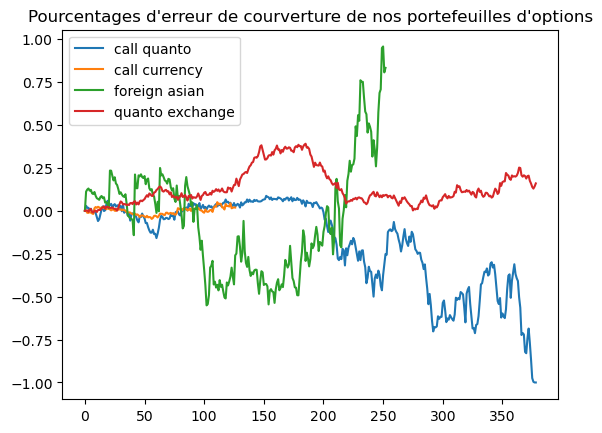

In [16]:
plt.title("Pourcentages d'erreur de courverture de nos portefeuilles d'options")
plt.plot(tracking_error_call_quanto, label = 'call quanto')
plt.plot(tracking_error_call_currency, label = 'call currency')
plt.plot(tracking_error_foreign_asian, label = 'foreign asian')
plt.plot(tracking_error_quanto_exchange, label = 'quanto exchange')
plt.legend()